In [1]:
%matplotlib inline

In [2]:
import sys
import os 
from glob import glob
import json

In [3]:
sys.path.insert(0, '../../')

In [4]:
import paleopy

In [5]:
from paleopy import plotting

In [6]:
plotting.scalar_plot

paleopy.plotting.scalar_plot.scalar_plot

In [7]:
from paleopy import Proxy 
from paleopy import Analogs
from paleopy import Ensemble
from paleopy.plotting import scalar_plot

In [8]:
djsons = '../../jsons/'
pjsons = '../../jsons/proxies'

In [9]:
from numpy import ma
import numpy as np
import xarray as xray

In [10]:
# !ls ../../jsons/proxies/

In [11]:
# ljson = glob('../../jsons/proxies/*.json')

### modify ALL the proxies so that they include the weights

In [12]:
# for file_in in ljson: 
#     file_out = file_in[:-5] + '_proxy.json'
#     with open(file_in, 'r') as fin: 
#         with open(file_out,'w') as fout:
#             proxy = json.load(fin)
#             proxy['weights'] = np.ones(len(proxy['analog_years'])).tolist()
#             json.dump(proxy, fout)

### test the new implementation of PALEOPY with just one proxy

In [13]:
p = Proxy(sitename='Rarotonga', \
          lon = -159.82, \
          lat = -21.23, \
          djsons = djsons, \
          pjsons = pjsons, \
          pfname = 'Rarotonga.json', \
          dataset = 'ersst', \
          variable ='sst', \
          measurement ='delta O18', \
          dating_convention = 'absolute', \
          calendar = 'gregorian',\
          chronology = 'historic', \
          season = 'DJF', \
          value = 0.6, \
          qualitative = 0, \
          calc_anoms = True, \
          detrend = True, \
        method = 'quintiles')

In [14]:
p.find_analogs()

In [15]:
p.proxy_repr(pprint=True, outfile=False)

{
sitename:Rarotonga
proxy_type:None
measurement:delta O18
dating_convention:absolute
calendar:gregorian
chronology:historic
coords:(200.18, -21.23)
aspect:None
elevation:None
season:DJF
dataset:ersst
variable:sst
calc_anoms:True
detrend:True
value:0.6
climatology:(1981, 2010)
period:(1979, 2014)
extracted_coords:[200.0, -22.0]
distance_point:87.56368858840081
trend_params:{'intercept': -60.965016377755163, 'slope': 0.030535947029886677}
category:WA
analog_years:[1982, 1997, 1999, 2000, 2001, 2006, 2009]
weights:[0.15645480307020584, 0.12800536294956205, 0.13090508326029401, 0.16334634614636281, 0.15762466128135916, 0.1220029495538857, 0.1416607937383304]
}


In [16]:
p.analog_years

array([1982, 1997, 1999, 2000, 2001, 2006, 2009], dtype=int32)

In [17]:
p.season

'DJF'

In [18]:
p.detrend

True

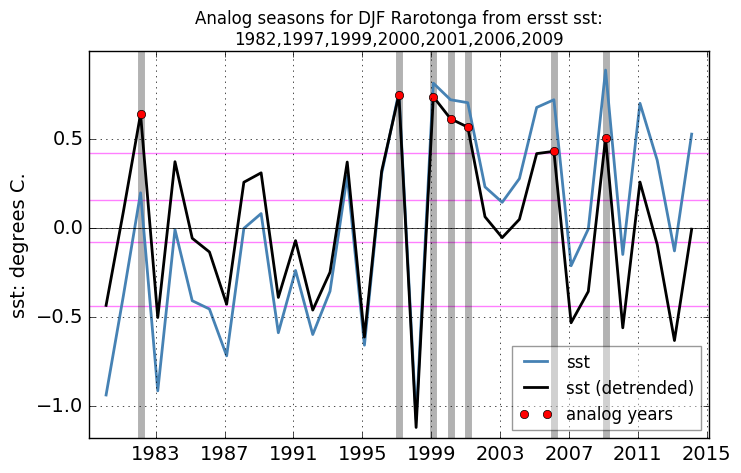

In [19]:
f = p.plot_season_ts()

In [20]:
a = Analogs(p, 'ncep', 'hgt_1000')

In [21]:
a.composite()

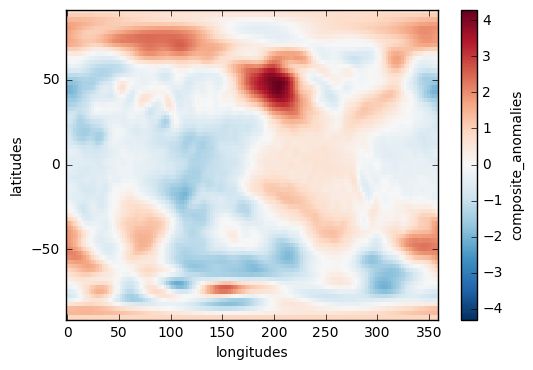

In [22]:
a.dset_compos['composite_anomalies'].plot()

In [23]:
p.weights

array([ 0.1564548 ,  0.12800536,  0.13090508,  0.16334635,  0.15762466,
        0.12200295,  0.14166079])

In [24]:
p.weights.sum()

0.99999999999999989

### now test with a CONSISTENT ensemble

In [25]:
ens = Ensemble(djsons=djsons, pjsons=pjsons)


            seasons and method [`detrend` or not] are consistent among proxies,
            the composite anomalies for each proxy can be calculated
            for the ensemble as a whole using the extended list of analog years
            


In [26]:
len(ens.df_proxies)

25

In [27]:
b = Analogs(ens, 'ncep', 'hgt_1000')

In [28]:
b.composite()

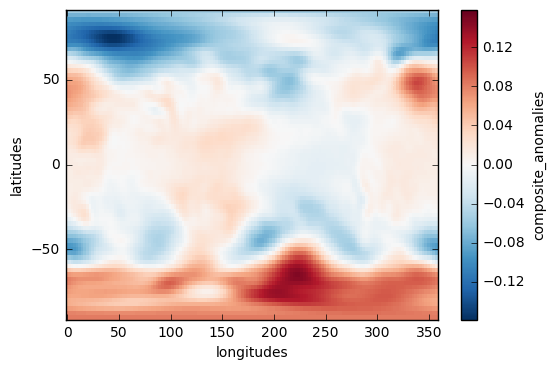

In [29]:
b.dset_compos['composite_anomalies'].plot()

In [30]:
len(ens.df_proxies)

25

In [31]:
len(ens.analog_years)

25

In [32]:
ens.df_proxies.head()

,analog_years,aspect,calc_anoms,calendar,category,chronology,climatology,coords,dataset,dating_convention,...,extracted_coords,measurement,period,proxy_type,season,sitename,trend_params,value,variable,weights
Amedee,"[1983, 1987, 1997, 2001, 2003, 2013, 2014]",None,True,gregorian,B,historic,"[1981, 2010]","[166.47, -22.48]",ersst,absolute,...,"[166.0, -22.0]",delta O18,"[1979, 2014]",None,DJF,Amedee,"{'intercept': -16.257205985829472, 'slope': 0....",-0.26,sst,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"
Avoca,"[1983, 1984, 1993, 2003, 2004, 2005, 2007]",NaN,False,NaN,WB,NaN,"[1981, 2010]","[171.405812, -43.043031]",ncep,NaN,...,"[172.5, -42.5]",NaN,"[1979, 2014]",NaN,DJF,Avoca,"{'intercept': 56.434411504533585, 'slope': -0....",-0.53,Tmean,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"
Browning Creek,"[1983, 1984, 1992, 1993, 2002, 2003, 2007]",NaN,False,NaN,WB,NaN,"[1981, 2010]","[169.836463, -43.850548]",ncep,NaN,...,"[170.0, -45.0]",NaN,"[1979, 2014]",NaN,DJF,Browning Creek,"{'intercept': 25.983608025284596, 'slope': -0....",-0.62,Tmean,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"
Cameron,"[1983, 1984, 1993, 2003, 2004, 2005, 2007]",NaN,False,NaN,WB,NaN,"[1981, 2010]","[171.505139, -42.934067]",ncep,NaN,...,"[172.5, -42.5]",NaN,"[1979, 2014]",NaN,DJF,Cameron,"{'intercept': 56.434411504533585, 'slope': -0....",-0.81,Tmean,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"
Caples,"[1983, 1984, 1992, 1993, 2001, 2004, 2007]",NaN,False,NaN,WB,NaN,"[1981, 2010]","[168.182845, -44.801851]",ncep,NaN,...,"[167.5, -45.0]",NaN,"[1979, 2014]",NaN,DJF,Caples,"{'intercept': 17.33270763616267, 'slope': -0.0...",-0.35,Tmean,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"


### test now with an INCONSISTENT ensemble 

In [33]:
ens = Ensemble(djsons=djsons, pjsons='../../jsons/proxies/inconsistents/')


            seasons and method [`detrend` or not] are inconsistent among proxies,
            the composite anomalies for EACH proxy can only be calculated
            INDEPENDENTLY, THEN combined ...
            


In [34]:
ens.df_proxies.head()

,analog_years,aspect,calc_anoms,calendar,category,chronology,climatology,coords,dataset,dating_convention,...,extracted_coords,measurement,period,proxy_type,season,sitename,trend_params,value,variable,weights
Amedee,"[1983, 1987, 1997, 2001, 2003, 2013, 2014, 1989]",None,True,gregorian,B,historic,"[1981, 2010]","[166.47, -22.48]",ersst,absolute,...,"[166.0, -22.0]",delta O18,"[1979, 2014]",None,NDJ,Amedee,"{'intercept': -16.257205985829472, 'slope': 0....",-0.26,sst,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"
Avoca,"[1983, 1984, 1993, 2003, 2004, 2005, 2007]",NaN,False,NaN,WB,NaN,"[1981, 2010]","[171.405812, -43.043031]",ncep,NaN,...,"[172.5, -42.5]",NaN,"[1979, 2014]",NaN,DJF,Avoca,"{'intercept': 56.434411504533585, 'slope': -0....",-0.53,Tmean,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"
Browning Creek,"[1983, 1984, 1992, 1993, 2002, 2003, 2007]",NaN,False,NaN,WB,NaN,"[1981, 2010]","[169.836463, -43.850548]",ncep,NaN,...,"[170.0, -45.0]",NaN,"[1979, 2014]",NaN,DJF,Browning Creek,"{'intercept': 25.983608025284596, 'slope': -0....",-0.62,Tmean,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"
Cameron,"[1983, 1984, 1993, 2003, 2004, 2005, 2007]",NaN,False,NaN,WB,NaN,"[1981, 2010]","[171.505139, -42.934067]",ncep,NaN,...,"[172.5, -42.5]",NaN,"[1979, 2014]",NaN,DJF,Cameron,"{'intercept': 56.434411504533585, 'slope': -0....",-0.81,Tmean,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"
Caples,"[1983, 1984, 1992, 1993, 2001, 2004, 2007]",NaN,False,NaN,WB,NaN,"[1981, 2010]","[168.182845, -44.801851]",ncep,NaN,...,"[167.5, -45.0]",NaN,"[1979, 2014]",NaN,DJF,Caples,"{'intercept': 17.33270763616267, 'slope': -0.0...",-0.35,Tmean,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"


In [35]:
ens.detrend

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [36]:
ens.climatology

[(1981, 2010),
 (1981, 2010),
 (1981, 2010),
 (1981, 2010),
 (1981, 2010),
 (1981, 2010),
 (1981, 2010),
 (1981, 2010),
 (1981, 2010),
 (1981, 2010),
 (1981, 2010),
 (1981, 2010),
 (1981, 2010),
 (1981, 2010),
 (1981, 2010),
 (1981, 2010),
 (1981, 2010),
 (1981, 2010),
 (1981, 2010),
 (1981, 2010),
 (1981, 2010),
 (1981, 2010),
 (1981, 2010),
 (1981, 2010),
 (1981, 2010)]

In [37]:
c = Analogs(ens, 'ncep', 'hgt_1000')

In [38]:
c.parent.description

'ensemble'

In [39]:
c.composite()

In [40]:
c.dset_compos

<xarray.Dataset>
Dimensions:              (latitudes: 73, longitudes: 144, proxy: 25, years: 23)
Coordinates:
  * longitudes           (longitudes) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 ...
  * years                (years) int64 1982 1983 1984 1987 1989 1991 1992 ...
  * latitudes            (latitudes) float32 90.0 87.5 85.0 82.5 80.0 77.5 ...
  * proxy                (proxy) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...
Data variables:
    pvalues              (proxy, latitudes, longitudes) float64 0.8443 ...
    composite_anomalies  (proxy, latitudes, longitudes) float64 0.305 0.305 ...
    composite_sample     (proxy, years, latitudes, longitudes) float64 nan ...
    weights              (proxy, years) float64 nan 1.0 nan 1.0 1.0 nan nan ...

In [41]:
from sys import getsizeof

In [42]:
getsizeof(c.dset_compos)

56

In [43]:
c.dset_compos

<xarray.Dataset>
Dimensions:              (latitudes: 73, longitudes: 144, proxy: 25, years: 23)
Coordinates:
  * longitudes           (longitudes) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 ...
  * years                (years) int64 1982 1983 1984 1987 1989 1991 1992 ...
  * latitudes            (latitudes) float32 90.0 87.5 85.0 82.5 80.0 77.5 ...
  * proxy                (proxy) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...
Data variables:
    pvalues              (proxy, latitudes, longitudes) float64 0.8443 ...
    composite_anomalies  (proxy, latitudes, longitudes) float64 0.305 0.305 ...
    composite_sample     (proxy, years, latitudes, longitudes) float64 nan ...
    weights              (proxy, years) float64 nan 1.0 nan 1.0 1.0 nan nan ...

In [44]:
from matplotlib import pyplot as plt

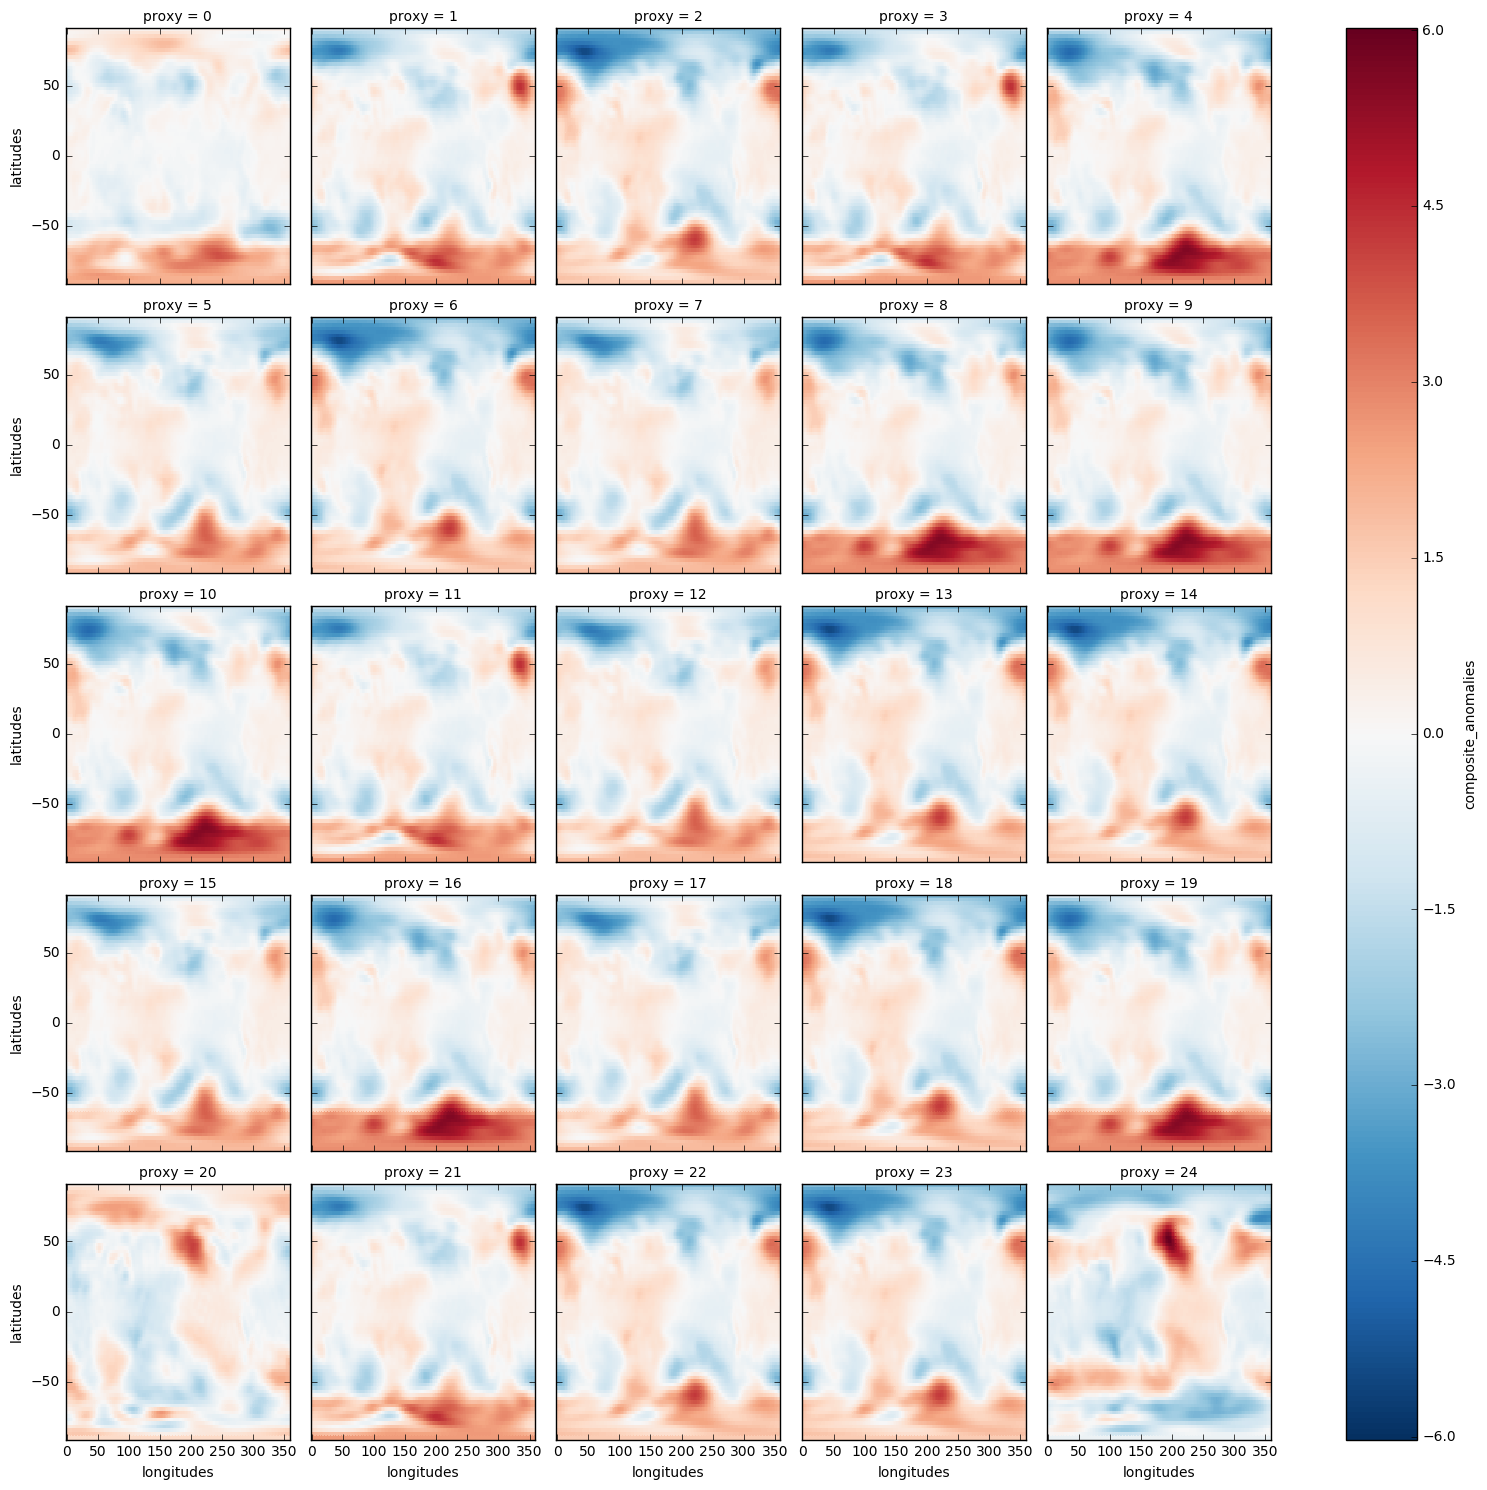

In [45]:
c.dset_compos['composite_anomalies'].plot(x='longitudes', y='latitudes', col='proxy', col_wrap=5)
f = plt.gcf()
f.savefig('/Users/nicolasf/Desktop/dummy_ensemble_plot.png', dpi=200)

In [46]:
d = {}

In [47]:
d['key2'] = 3

In [48]:
d

{'key2': 3}

In [52]:
'key1' in d

False

In [53]:
l = [1]

In [54]:
l * 4

[1, 1, 1, 1]

In [60]:
ll = []

In [61]:
ll.extend(l * 4)

In [62]:
ll

[1, 1, 1, 1]